<a href="https://colab.research.google.com/github/K-107/Anomaly-Detection/blob/main/bone_segmentation/label_generater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [76]:
PATH = '/content/drive/MyDrive/bone/making'
bones = os.listdir(PATH)

WIDTH = 800
HEIGHT = 800

bones_box = np.zeros((len(bones),WIDTH,HEIGHT))

for num, bone in enumerate(bones):

  image_pil = Image.open(PATH+'/'+f'{bone}')
  image = np.array(image_pil)

  resized_image = cv2.resize(image,(WIDTH,HEIGHT))

  grey_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

  bones_box[num] = grey_image

  print(f"{bone} size = ", grey_image.shape)

8269.png size =  (800, 800)
8044.png size =  (800, 800)
8158.png size =  (800, 800)
8239.png size =  (800, 800)
8088.png size =  (800, 800)
8272.png size =  (800, 800)
8134.png size =  (800, 800)
8094.png size =  (800, 800)
8016.png size =  (800, 800)
7236.png size =  (800, 800)


In [ ]:
bones_box

In [78]:
bones_box.dtype

dtype('float64')

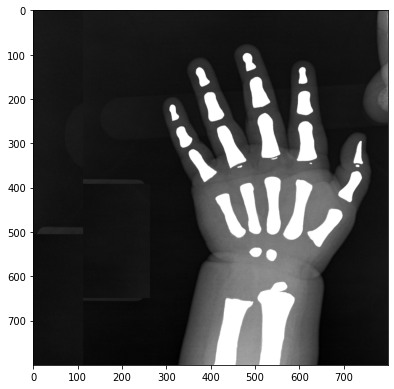

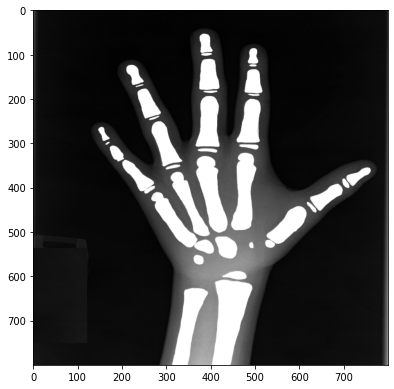

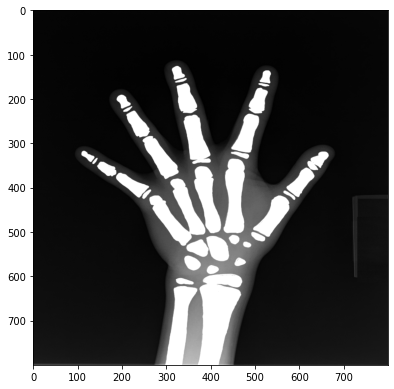

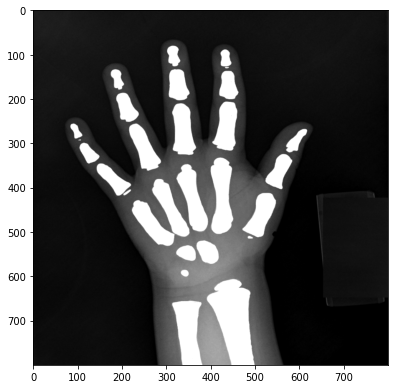

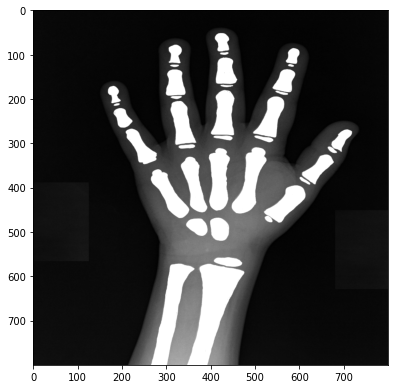

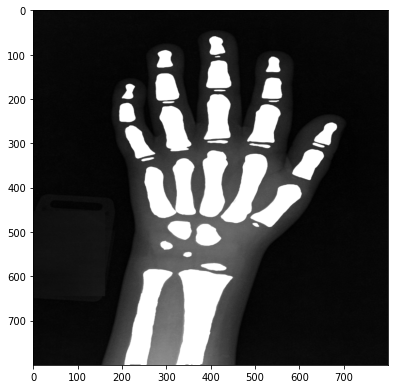

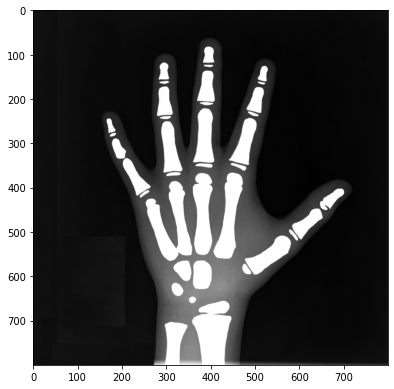

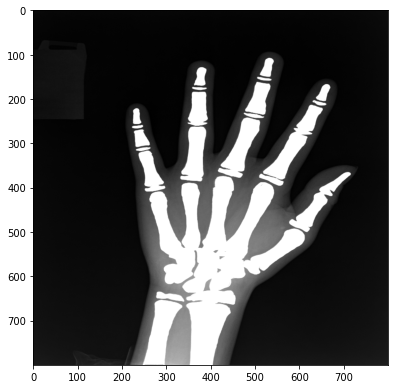

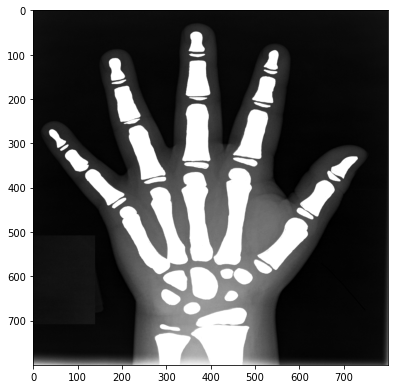

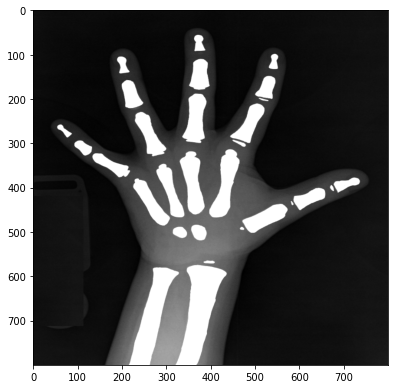

In [79]:
rows = 4
cols = 4

for num, bone in enumerate(bones_box):
  # print(num)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  plt.imshow(bone, cmap='gray')

In [80]:
np.where(bones_box<255,'0.','255.').dtype

dtype('<U4')

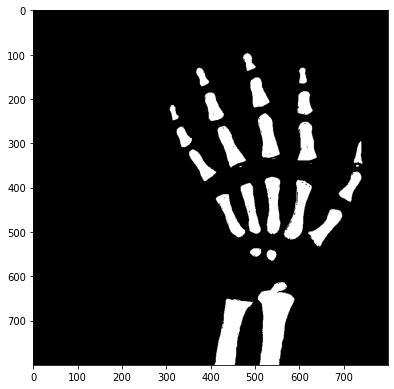

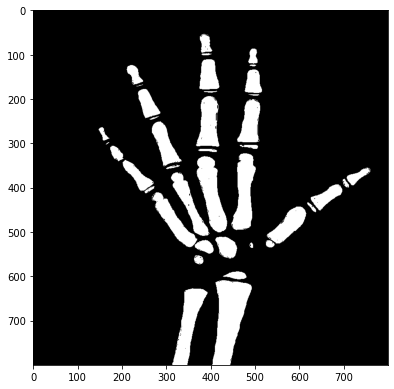

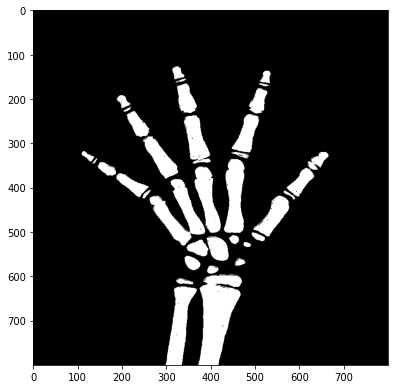

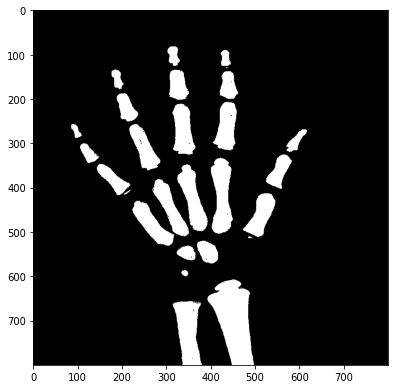

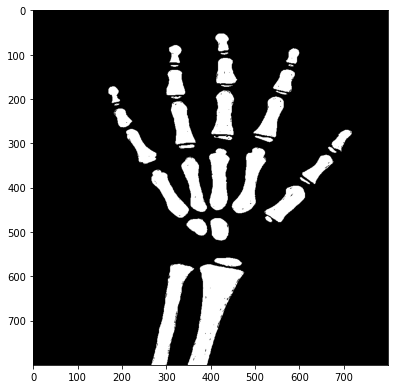

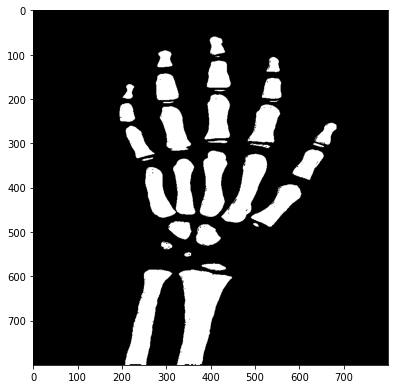

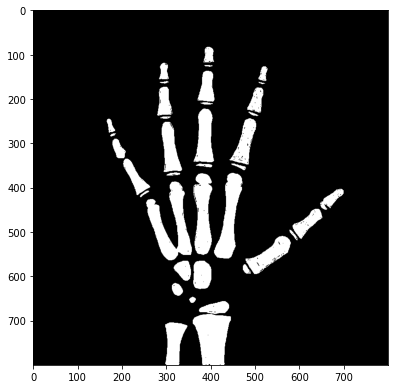

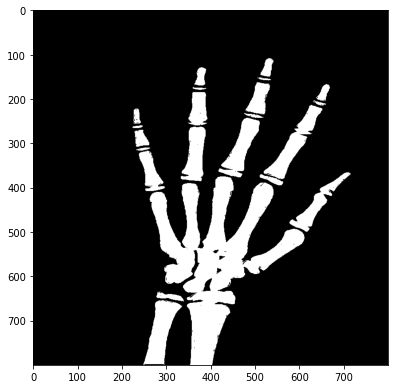

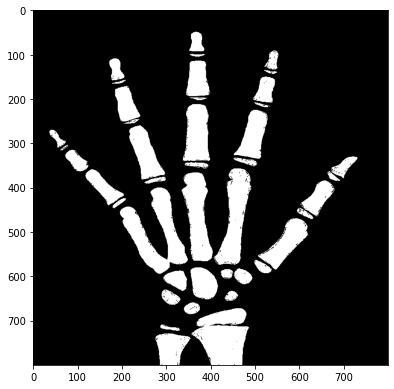

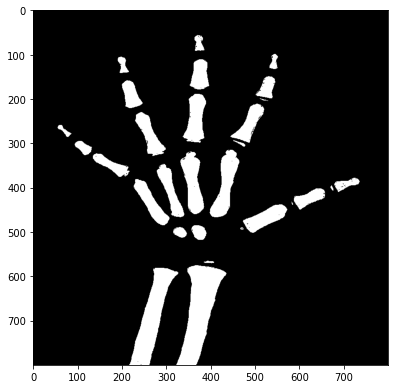

In [90]:
ground_truths = np.where(bones_box<255,'0.','255.').astype('float64')

SAVE_PATH = '/content/drive/MyDrive/bone/labels'

rows = 4
cols = 4

for num, ground_truth in enumerate(ground_truths):
  # print(num)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  plt.imshow(ground_truth, cmap='gray')
  im = Image.fromarray(ground_truth)

  if not os.path.exists(SAVE_PATH):
            os.makedirs(SAVE_PATH)
  plt.imsave(SAVE_PATH+'/'+f'{num}.jpeg', im)